In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
### for reproducible experiments
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)

In [26]:
import numpy as np
import pandas as pd
import git
import mlflow.keras
import os, sys
from gensim.models.wrappers import FastText

#import tensorflow_hub as hub
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import random
%matplotlib inline
pd.set_option('display.max_rows', None)

sys.path.append('../citation_bio_trainer')
#from feature.SpacyFeaturizer import get_spacy_feats_from_text
from feature.Featurizer import Featurizer
from util.Utils import calulate_ser_jer, load_from_folder, pad_sequences, load_embedding_matrix, evaluate, log_mlflow_results
import warnings
from model.FTLSTM import calulate_ser_jer, get_model, plot_output
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [27]:
path = '/home/joshib/cs_data/citation-bio-labelled-data-2020-06-08~15:13:57.766608/nlp/exps/output/2020-06-08~15:13:57.766608'
#data_df = pd.read_csv(path+'/data-2020-06-08~15:14:01.185827.csv')

## LSTM with random embedding model

In [28]:
%%time
train_data_path = '/nlp/cs_mixed_20k/cs_mixed_20k_train/'
test_data_path  = '/nlp/cs_mixed_20k/cs_mixed_20k_test/'
eval_without_intra_newline_path  = '/nlp/eval_without_intra_newline/'
eval_with_intra_newline_path     = '/nlp/eval_with_intra_newline/'

sentences_train, sent_tags_train = load_from_folder(train_data_path)
sentences_test, sent_tags_test = load_from_folder(test_data_path)
sentences_eval1, sent_tags_eval1 = load_from_folder(eval_without_intra_newline_path)
#sentences_eval2, sent_tags_eval2 = load_from_folder(eval_with_intra_newline_path)

CPU times: user 1min 25s, sys: 234 ms, total: 1min 25s
Wall time: 1min 25s


In [6]:
xtrain, xvalid, ytrain, yvalid = train_test_split(sentences_train, sent_tags_train, test_size=0.1, random_state=42)

In [7]:
feat_config = {'max_vocab':100000,
               'lstm_feats':True, 
               'spacy_feats':True, 
               'google_feats': False, 
               'parscit_feats': True}

In [8]:
%%time
#featurizer = Featurizer(feat_config)
#print("loading train ...")
#train_dict, tokenizer, maxlen = featurizer.fit_transform(xtrain, ytrain)
# print("loading valid ...")
# valid_dict = featurizer.transform(xvalid, yvalid)
# print("loading test ...")
# test_dict  = featurizer.transform(sentences_test, sent_tags_test)
# print("loading evals ...")
#eval1_dict  = featurizer.transform(sentences_eval1, sent_tags_eval1)
# #eval_dict2  = featurizer.transform(sentences_eval2, sent_tags_eval2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [9]:
%%time
### Load from file
maxlen = 3861
train_dict={}
train_dict['labels'] = np.load('/nlp/temp/train_dict_labels.npy')
train_dict['lstm_feats']=np.load('/nlp/temp/train_dict_lstm_feats.npy')
train_dict['spacy_num_feats'] = np.load('/nlp/temp/train_dict_spacy_feats.npy')

valid_dict={}
valid_dict['labels']=np.load('/nlp/temp/valid_dict_labels.npy')
valid_dict['lstm_feats']=np.load('/nlp/temp/valid_dict_lstm_feats.npy')
valid_dict['spacy_num_feats']=np.load('/nlp/temp/valid_dict_spacy_feats.npy')

test_dict={}
test_dict['labels'] = np.load('/nlp/temp/test_dict_labels.npy')
test_dict['lstm_feats']=np.load('/nlp/temp/test_dict_lstm_feats.npy')
test_dict['spacy_num_feats']=np.load('/nlp/temp/test_dict_spacy_feats.npy')

eval1_dict={}
eval1_dict['labels'] = np.load('/nlp/temp/eval1_dict_labels.npy')
eval1_dict['lstm_feats']=np.load('/nlp/temp/eval1_dict_lstm_feats.npy')
eval1_dict['spacy_num_feats']=np.load('/nlp/temp/eval1_dict_spacy_feats.npy')

CPU times: user 2.45 ms, sys: 3.38 s, total: 3.38 s
Wall time: 3.38 s


### Neural parscit features (temporary fix)

In [10]:
# %%time
# from feature.ParsCitLSTM import ParsCitLSTM
# c = {
#         "model_file": "/nlp/parscit/parscit-29-latest.h5",
#         "label_dict_file": "/nlp/parscit/labels.json",
#         "tfhub_model_dir": "/nlp/parscit/resource/"}
# model = ParsCitLSTM(model_config=c)

In [11]:
# %%time
# train_df = pd.DataFrame([])
# valid_df = pd.DataFrame([])
# test_df = pd.DataFrame([])
# eval1_df = pd.DataFrame([])
# eval2_df = pd.DataFrame([])

# train_df['text'] = np.array(xtrain, dtype='object')
# valid_df['text'] = np.array(xvalid, dtype='object')
# test_df['text'] = np.array(sentences_test, dtype='object')
# eval1_df['text'] = np.array(sentences_eval1, dtype='object')
# eval2_df['text'] = np.array(sentences_eval2, dtype='object')

In [12]:
%%time
# train_parscit = model.get_parscit_blocks(train_df)
# valid_parscit = model.get_parscit_blocks(valid_df)
# test_parscit  = model.get_parscit_blocks(test_df)
# eval1_parscit = model.get_parscit_blocks(eval1_df)
# eval2_parscit = model.get_parscit_blocks(eval2_df)


# train_parscit = pd.read_pickle('/nlp/temp/train_parscit.pickle')
# valid_parscit = pd.read_pickle('/nlp/temp/valid_parscit.pickle')
# test_parscit = pd.read_pickle('/nlp/temp/test_parscit.pickle')
# eval1_parscit = pd.read_pickle('/nlp/temp/eval1_parscit.pickle')
#eval2_parscit = pd.read_pickle('/nlp/temp/eval2_parscit.pickle')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [13]:
# def pad_dummy_feats(df, maxlen):
#     parscit = df.copy()
#     parscit_feats = list(parscit['parscit_feat']) 
#     parscit_padded = []
#     for ind in range(len(parscit_feats)):
#         parscit_mask = np.zeros((maxlen, 14), dtype='int8')
#         if len(parscit_feats[ind]) <= maxlen:
#             parscit_mask[0:len(parscit_feats[ind]), :] = parscit_feats[ind][:]
#         else:
#             parscit_mask[:] = parscit_feats[ind][0:maxlen,:]
#         parscit_padded.append(parscit_mask)
#     parscit_arr = np.array([i.tolist() for i in parscit_padded])
#     return parscit_arr

In [14]:
# %%time
# train_parscit_arr = pad_dummy_feats(train_parscit, maxlen)
# valid_parscit_arr = pad_dummy_feats(valid_parscit, maxlen)
# test_parscit_arr  = pad_dummy_feats(test_parscit, maxlen)
# eval1_parscit_arr = pad_dummy_feats(eval1_parscit, maxlen)
#eval2_parscit_arr = pad_dummy_feats(eval2_parscit, maxlen)

In [15]:
%%time
## load saved files
train_parscit_arr = np.load('/nlp/temp/train_parscit_arr.npy')
valid_parscit_arr = np.load('/nlp/temp/valid_parscit_arr.npy')
test_parscit_arr  = np.load('/nlp/temp/test_parscit_arr.npy')
eval1_parscit_arr = np.load('/nlp/temp/eval1_parscit_arr.npy')

CPU times: user 3 ms, sys: 3.35 s, total: 3.36 s
Wall time: 3.36 s


## Keras with pre-trained fast text embedding

In [16]:
%%time
#wiki_model = FastText.load_fasttext_format('/nlp/cc.en.300.bin')
#embedding_matrix = load_embedding_matrix(wiki_model, feat_config['max_vocab'], tokenizer.word_index, 300)
embedding_matrix=np.load('/nlp/temp/embedding_matrix.npy')

CPU times: user 2.03 ms, sys: 92.3 ms, total: 94.4 ms
Wall time: 93.8 ms


In [17]:
model_config = {'embedding': {'use':True, 'matrix':embedding_matrix, 'trainable':True},## trainableTrue is significantly better 
                'lstm': {'use':True, 'num': 1, 'units':50, 'dropout':0.2},
                'dense':{'use':False, 'num': 1, 'units':256, 'dropout':0.2},
                'optimizer': Adam(
        learning_rate=0.001,
        beta_1=0.0,
        beta_2=0.0,
        epsilon=1e-05,
        amsgrad=False,
    ),
                'output_activation' : 'sigmoid', 
                'batch_size': 16, ## lower the better
                'aux_feats': {'use':True, 'dim':26, 'place':'before_lstm'}, 
                'timedistributed':{'use':False}, ## no difference at all True or False
                'shuffle': True ## not much different than False
                
               }

In [18]:
%%time
model = get_model(feat_config, model_config, maxlen)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3861)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 3861, 300)    30000000    input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3861, 26)]   0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3861, 326)    0           embedding[0][0]                  
                                                                 input_2[0][0]                

In [19]:
%%time
if feat_config['spacy_feats'] and not feat_config['parscit_feats']:
    print('only spacy not parscit')
    train_aux = train_dict['spacy_num_feats']
    valid_aux = valid_dict['spacy_num_feats']
    test_aux  = test_dict['spacy_num_feats']
    eval1_aux  = eval1_dict['spacy_num_feats']
    
elif feat_config['spacy_feats'] and  feat_config['parscit_feats']:
    print("both spacy and parscit")
    train_aux = np.concatenate((train_dict['spacy_num_feats'], train_parscit_arr), axis=-1)
    valid_aux = np.concatenate((valid_dict['spacy_num_feats'], valid_parscit_arr), axis=-1)
    test_aux  = np.concatenate((test_dict['spacy_num_feats'], test_parscit_arr), axis=-1)
    eval1_aux  = np.concatenate((eval1_dict['spacy_num_feats'], eval1_parscit_arr), axis=-1)
else:
    print('only lstm features')
#eval1_aux = np.concatenate((eval_dict1['spacy_num_feats'], eval1_parscit_arr), axis=-1)
#eval2_aux = np.concatenate((eval_dict2['spacy_num_feats'], eval2_parscit_arr), axis=-1)

both spacy and parscit
CPU times: user 4.42 s, sys: 3.6 s, total: 8.02 s
Wall time: 8.02 s


multi input model
Epoch 1/100
989/989 [==============================] - 339s 343ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 8.9219e-04 - val_accuracy: 0.9997
Epoch 2/100
989/989 [==============================] - 338s 342ms/step - loss: 7.3189e-04 - accuracy: 0.9998 - val_loss: 5.3819e-04 - val_accuracy: 0.9998
Epoch 3/100
989/989 [==============================] - 340s 343ms/step - loss: 5.2850e-04 - accuracy: 0.9998 - val_loss: 4.5615e-04 - val_accuracy: 0.9999
Epoch 4/100
989/989 [==============================] - 339s 343ms/step - loss: 4.3514e-04 - accuracy: 0.9999 - val_loss: 3.6032e-04 - val_accuracy: 0.9999
Epoch 5/100
989/989 [==============================] - 339s 343ms/step - loss: 3.2946e-04 - accuracy: 0.9999 - val_loss: 2.4772e-04 - val_accuracy: 0.9999
Epoch 6/100
989/989 [==============================] - 339s 343ms/step - loss: 2.3498e-04 - accuracy: 0.9999 - val_loss: 2.2837e-04 - val_accuracy: 0.9999
Epoch 7/100
989/989 [==============================] - 3

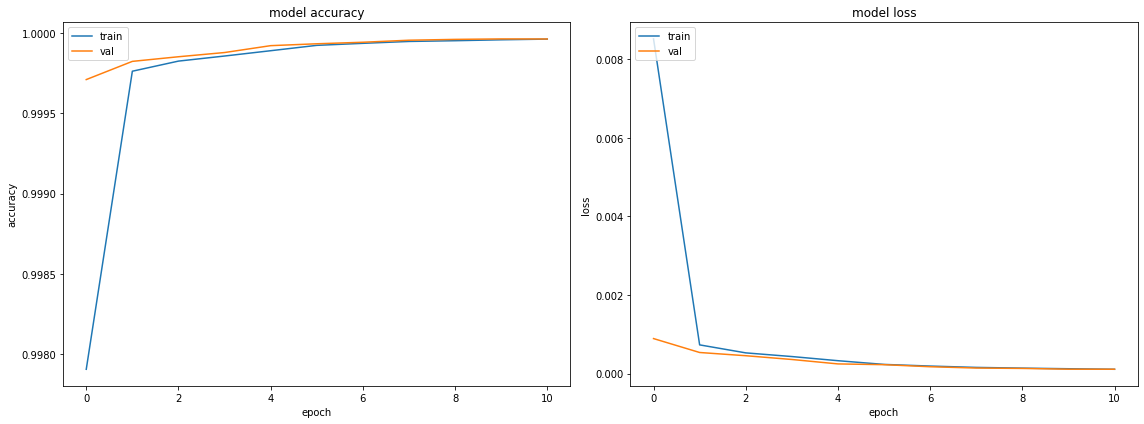

In [20]:
%%time
early_stop= EarlyStopping(monitor='val_loss',patience=3,verbose=0,mode='min',restore_best_weights=False, min_delta=0.0001)

## multi input
if model_config['aux_feats']['use']:
    print("multi input model")
    history = model.fit([train_dict['lstm_feats'], train_aux], train_dict['labels'], verbose=1, epochs=100, batch_size= model_config['batch_size'], \
                    validation_data=([valid_dict['lstm_feats'], valid_aux], valid_dict['labels']), callbacks=[early_stop], shuffle=model_config['shuffle'])
else:
    print("single input model")
    history = model.fit(train_dict['lstm_feats'], train_dict['labels'], verbose=1, epochs=100, batch_size= model_config['batch_size'], \
                        validation_data=(valid_dict['lstm_feats'], valid_dict['labels']), callbacks=[early_stop], shuffle=model_config['shuffle'])

plot_output(history)

In [21]:
print('done')

done


### Analysis on validation data

In [22]:
%%time
if model_config['aux_feats']['use']:
    valid_probs = model.predict([valid_dict['lstm_feats'], valid_aux])
else:
    valid_probs = model.predict(valid_dict['lstm_feats'])

valid_probs = valid_probs.reshape(valid_probs.shape[0], valid_probs.shape[1])
valid_preds = np.where(valid_probs > 0.5, 1, 0)

valid_true_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(valid_dict['labels'], yvalid)]
valid_pred_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(valid_preds, yvalid)]
result_valid = evaluate(valid_true_ls, valid_pred_ls)

CPU times: user 14.1 s, sys: 2.06 s, total: 16.1 s
Wall time: 11.9 s


In [23]:
result_valid

{'count': 1758,
 'mean_ser': 0.002670961444572739,
 'mean_jer': 0.0034327840201287072,
 'mean_acc': 0.9998156923892054,
 'num_mistakes_seq': 191,
 'num_mistakes_all': 247}

In [23]:
result_valid

{'count': 1758,
 'mean_ser': 0.0012784403468418335,
 'mean_jer': 0.00434950135293211,
 'mean_acc': 0.9998337824028184,
 'num_mistakes_seq': 172,
 'num_mistakes_all': 214}

In [18]:
result_valid

{'count': 1758,
 'mean_ser': 0.0013398960994772864,
 'mean_jer': 0.0061860178215543205,
 'mean_acc': 0.9997702457002545,
 'num_mistakes_seq': 202,
 'num_mistakes_all': 250}

In [25]:
result_valid

{'count': 1758,
 'mean_ser': 0.0011014967087715273,
 'mean_jer': 0.007994979741352154,
 'mean_acc': 0.9997256255247973,
 'num_mistakes_seq': 246,
 'num_mistakes_all': 319}

In [44]:
result_valid ## 1 lstm (100 units) and spacy and parscit feats added before with dropout (0.2)

{'count': 1758,
 'mean_ser': 0.0012784403468418335,
 'mean_jer': 0.00434950135293211,
 'mean_acc': 0.9999684720958897,
 'num_mistakes': 172}

In [30]:
count_valid = 0
for ind in range(len(valid_preds)):
    pred = valid_preds[ind]
    true = valid_dict['labels'][ind]
    if (true == pred).all():
        pass
    else:
        count_valid += 1
        fp_ind = np.where((pred == 1) & (true == 0))[0]
        fn_ind = np.where((pred == 0) & (true == 1))[0]
        if len(fp_ind) > 0:
            #print(fp_ind)
            print(ind, 'False positives:', fp_ind)
            for x in fp_ind:
                #print(x)
                print(np.array(xvalid[ind].split(" "))[max(0, x-3):x+4])
        if len(fn_ind) > 0:
            print(ind, 'False negatives:', fn_ind)
            for x in fn_ind:
                print(np.array(xvalid[ind].split(" "))[max(0, x-3):x+4])

13 False negatives: [449]
['Pilote' 'L.' '\n' 'Premature' 'cardiovascular' 'disease' 'following']
44 False positives: [1653]
['C.-c' '.' '\n' 'Hui' ',' 'Formation' 'of']
44 False negatives: [1976]
['8' 'May.' '\n' 'VeriFinger' '9.0' '(' '2017']
56 False positives: [820]
['2017' '.' '\n' 'U.S.' 'Geological' 'Survey' ',']
59 False positives: [113]
['.' 'https://www.terna.it/en-gb/sistemaelettrico/statisticaldata.aspx'
 '\n' '(' '\n' 'accessed' 'July']
59 False negatives: [286]
[')' '1' '\n' '(' '12' ')' 'A.M.']
67 False negatives: [140]
['abstract' '.' '\n' 'Heim' 'C.' 'Pituitary' '-']
80 False negatives: [525]
[',' 'Espoo' '\n' '(' '14' ')' 'BETATHERM']
84 False negatives: [57]
[',' 'S.C.' '\n' '(' '3' ')' 'McCully']
102 False positives: [18]
[',' 'Bronzie' '\n' 'JD' ',' 'editors' '.']
104 False negatives: [289]
['cases' '.' '\n' 'OECD' 'Innovation' 'strategy' '2015']
112 False negatives: [425]
['/' 'maud' '\n' 'Chen' ',' 'S.' ',']
113 False negatives: [219 227]
['-' '2155C.' '\n' '(' '

### Analysis of test result

In [29]:
%%time
#keras_model = mlflow.keras.load_model("s3://caps-s3-mlflow/artifacts/4/e814b3fd2d854c1a83c5998cea627b59/artifacts/models")
if model_config['aux_feats']['use']:
    test_probs = model.predict([test_dict['lstm_feats'], test_aux])
else:
    test_probs = model.predict(test_dict['lstm_feats'])
test_probs = test_probs.reshape(test_probs.shape[0], test_probs.shape[1])
test_preds = np.where(test_probs > 0.5, 1, 0)

test_true_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(test_dict['labels'], sent_tags_test)]
test_pred_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(test_preds, sent_tags_test)]
result_test = evaluate(test_true_ls, test_pred_ls)

CPU times: user 16.1 s, sys: 2.1 s, total: 18.2 s
Wall time: 13.1 s


In [30]:
result_test

{'count': 1953,
 'mean_ser': 0.002312233117391255,
 'mean_jer': 0.0023378004500377767,
 'mean_acc': 0.9998626190315792,
 'num_mistakes_seq': 177,
 'num_mistakes_all': 215}

In [25]:
result_test

{'count': 1953,
 'mean_ser': 0.001415943645218744,
 'mean_jer': 0.0038270965229455964,
 'mean_acc': 0.999847376511478,
 'num_mistakes_seq': 193,
 'num_mistakes_all': 226}

In [20]:
result_test

{'count': 1953,
 'mean_ser': 0.0013354845998113974,
 'mean_jer': 0.004599574846260113,
 'mean_acc': 0.9998220837849977,
 'num_mistakes_seq': 197,
 'num_mistakes_all': 228}

In [29]:
result_test

{'count': 1953,
 'mean_ser': 0.0013761586111869619,
 'mean_jer': 0.006408854919855137,
 'mean_acc': 0.9997688756633113,
 'num_mistakes_seq': 247,
 'num_mistakes_all': 303}

In [46]:
result_test ## 1 lstm (100 units) and spacy and parscit feats added before with dropout (0.2)

{'count': 1953,
 'mean_ser': 0.001415943645218744,
 'mean_jer': 0.0038270965229455964,
 'mean_acc': 0.9999700286438639,
 'num_mistakes': 193}

In [33]:
tags = {'dataset':'cs_mixed_20k', 'data_split':'test', 'version':2} 
del model_config['embedding']['matrix'] 
opt = model_config['optimizer']
model_config['optimizer'] = str(opt.get_config())
log_mlflow_results(model, result_test, feat_config, model_config, tags)

2020/08/17 15:26:20 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under s3://caps-s3-mlflow/artifacts/4/977e2cc7b36040f79dde3d6303d26952/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
count = 0
for ind in range(len(test_preds)):
    pred = test_preds[ind]
    true = new_y_test_enc[ind]
    if (true == pred).all():
        pass
    else:
        count += 1
        fp_ind = np.where((pred == 1) & (true == 0))[0]
        fn_ind = np.where((pred == 0) & (true == 1))[0]
        if len(fp_ind) > 0:
            #print(fp_ind)
            print(ind, 'False positives:', fp_ind)
            for x in fp_ind:
                #print(x)
                print(np.array(new_X_test[ind])[max(0, x-3):x+4])
        if len(fn_ind) > 0:
            print(ind, 'False negatives:', fn_ind)
            for x in fn_ind:
                print(np.array(new_X_test[ind])[max(0, x-3):x+4])

In [78]:
del eval_dict1

### Evaluation of eval dataset

In [ ]:
#keras_model = mlflow.keras.load_model("s3://caps-s3-mlflow/artifacts/4/e42c50d933ff49fb826dfe5874fa6d51/artifacts/models")

In [31]:
if model_config['aux_feats']['use']:
    eval1_probs = model.predict([eval1_dict['lstm_feats'], eval1_aux])
else:
    eval1_probs = model.predict(eval1_dict['lstm_feats'])
eval1_probs = eval1_probs.reshape(eval1_probs.shape[0], eval1_probs.shape[1])
eval1_preds = np.where(eval1_probs > 0.5, 1, 0)


eval1_true_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(eval1_dict['labels'], sent_tags_eval1)]
eval1_pred_ls = [i[0:len(j.split(" "))].tolist() for i,j in zip(eval1_preds, sent_tags_eval1)]
result_eval1 = evaluate(eval1_true_ls, eval1_pred_ls)

In [32]:
result_eval1

{'count': 1328,
 'mean_ser': 4.210459340312366e-05,
 'mean_jer': 0.007138451427790611,
 'mean_acc': 0.9998315270762984,
 'num_mistakes_seq': 116,
 'num_mistakes_all': 393}

In [27]:
result_eval1

{'count': 1328,
 'mean_ser': 0.0,
 'mean_jer': 0.016687219743176895,
 'mean_acc': 0.9996126436724514,
 'num_mistakes_seq': 309,
 'num_mistakes_all': 985}

In [22]:
result_eval1

{'count': 1328,
 'mean_ser': 2.19963007681044e-05,
 'mean_jer': 0.006529217863205044,
 'mean_acc': 0.9998463083348137,
 'num_mistakes_seq': 117,
 'num_mistakes_all': 353}

In [32]:
result_eval1

{'count': 1328,
 'mean_ser': 4.210459340312366e-05,
 'mean_jer': 0.009084201992764636,
 'mean_acc': 0.9997885001704157,
 'num_mistakes_seq': 123,
 'num_mistakes_all': 495}

In [ ]:
eval_probs2 = model.predict([eval_dict2['lstm_feats'], eval_dict2['spacy_num_feats']])
eval_probs2 = eval_probs2.reshape(eval_probs2.shape[0], eval_probs2.shape[1])
eval_preds2 = np.where(eval_probs2 > 0.5, 1, 0)
result_eval2 = evaluate(eval_dict2['labels'].tolist(), eval_preds2.tolist())

In [40]:
### Visualize errors

In [ ]:
count_valid = 0
for ind in range(len(eval1_aux)):
    pred = eval_preds1[ind]
    true = eval_dict1['labels'][ind]
    if (true == pred).all():
        pass
    else:
        count_valid += 1
        fp_ind = np.where((pred == 1) & (true == 0))[0]
        fn_ind = np.where((pred == 0) & (true == 1))[0]
        if len(fp_ind) > 0:
            #print(fp_ind)
            print(ind, 'False positives:', fp_ind)
            for x in fp_ind:
                #print(x)
                print(np.array(sentences_eval1[ind].split(" "))[max(0, x-3):x+4])
        if len(fn_ind) > 0:
            print(ind, 'False negatives:', fn_ind)
            for x in fn_ind:
                print(np.array(sentences_eval1[ind].split(" "))[max(0, x-3):x+4])

In [ ]:
### Save eval results to file

In [60]:
min(len(sentences_eval1[ind].split(" ")), maxlen)

3861

In [41]:
ind = 0
eval_path_dict = {}
for fpath in os.listdir(eval_without_intra_newline_path):
    if fpath not in ['data-gen-config.json', 'data_generation_stats.csv'] and ".csv" in fpath:
        eval_path_dict[ind] = fpath
        ind += 1

In [66]:
min(len(sentences_eval1[75].split(" ")), maxlen)

3861

In [65]:
len(eval_preds1[75])

3861

In [71]:
eval_folder_path = '/nlp/eval_data_retok_predictions_f3a9cc61e30f460499b95a4c2b7957ae'
if not os.path.exists(eval_folder_path):
    os.makedirs(eval_folder_path)
for ind in range(len(eval_preds1)):
    #print(ind)
    df = pd.DataFrame([], columns=['x', 'y'])
    seq_len = min(len(sentences_eval1[ind].split(" ")), maxlen)
    df['x'] = sentences_eval1[ind].split(" ")[0:seq_len]
    df['y'] = eval_preds1[ind][0:seq_len]
    df.to_csv(os.path.join(eval_folder_path, eval_path_dict[ind][0:-4] + '_pred.csv'))

In [34]:
tags = {'dataset':'cs_mixed_20k', 'data_split':'eval_with_intra_newline_path','version':2}
#opt = model_config['optimizer']
#model_config['optimizer'] = str(opt.get_config())
log_mlflow_results(model, result_eval1, feat_config, model_config, tags)

2020/08/17 15:26:46 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under s3://caps-s3-mlflow/artifacts/4/1196f4fb37e74e3a9c88482f4c7c71b8/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
sentences_train[0][0:500]

In [ ]:
from feature.ParsCitLSTM import ParsCitLSTM

In [ ]:
#df = pd.read_csv('/nlp/parscit/data.csv')

In [ ]:
df = pd.DataFrame([])
df['text'] = np.array(sentences_train[0:100], dtype='object')

In [ ]:
%%time
df_out = model.dask_predict(df)

In [ ]:
#df_out

In [ ]:
# %%time
# import dask.dataframe as dd
# parscit_df = model.get_parscit_dask(df, blocksize=10)

In [ ]:
len(sentences_train[0].split(" "))

In [ ]:
%%time
x,y,z = model.predict(sentences_train[0])

In [ ]:
# for i,j in zip(x,y):
#     print(i,j)

### One predict test

In [ ]:
# model = load_model(c['model_file'])
# model._name='parscit_model'

In [ ]:
ls = np.random.randint(10, size=(1000))

In [ ]:
df = pd.DataFrame([], columns=['num'])
df['num'] = ls

In [ ]:
%%time
import pandas as pd
train_parscit = pd.read_pickle('/nlp/temp/train_parscit.pickle')
valid_parscit = pd.read_pickle('/nlp/temp/valid_parscit.pickle')
test_parscit = pd.read_pickle('/nlp/temp/test_parscit.pickle')
eval1_parscit = pd.read_pickle('/nlp/temp/eval1_parscit.pickle')
eval2_parscit = pd.read_pickle('/nlp/temp/eval2_parscit.pickle')

In [ ]:
def pad_dummy_feats(parscit, maxlen):
    parscit_feats = list(parscit['parscit_feat']) 
    parscit_padded = []
    for ind in range(len(parscit_feats)):
        parscit_mask = np.zeros((maxlen, 14), dtype='int8')
        if len(parscit_feats[ind]) <= maxlen:
            parscit_mask[0:len(parscit_feats[ind]), :] = parscit_feats[ind][:]
        else:
            parscit_mask[:] = parscit_feats[ind][0:maxlen,:]

        parscit_padded.append(parscit_mask)
    parscit_arr = np.array([i.tolist() for i in parscit_padded])
    return parscit_arr

In [59]:
# %%time
# np.save('/nlp/temp/train_dict_labels.npy', train_dict['labels'])
# np.save('/nlp/temp/train_dict_lstm_feats.npy', train_dict['lstm_feats'])
# np.save('/nlp/temp/train_dict_spacy_feats.npy', train_dict['spacy_num_feats'])

# np.save('/nlp/temp/valid_dict_labels.npy', valid_dict['labels'])
# np.save('/nlp/temp/valid_dict_lstm_feats.npy', valid_dict['lstm_feats'])
# np.save('/nlp/temp/valid_dict_spacy_feats.npy', valid_dict['spacy_num_feats'])

# np.save('/nlp/temp/test_dict_labels.npy', test_dict['labels'])
# np.save('/nlp/temp/test_dict_lstm_feats.npy', test_dict['lstm_feats'])
# np.save('/nlp/temp/test_dict_spacy_feats.npy', test_dict['spacy_num_feats'])

In [71]:
np.save('/nlp/temp/eval1_dict_labels.npy', eval1_dict['labels'])
np.save('/nlp/temp/eval1_dict_lstm_feats.npy', eval1_dict['lstm_feats'])
np.save('/nlp/temp/eval1_dict_spacy_feats.npy', eval1_dict['spacy_num_feats'])